In [1]:
import pymongo
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random

client = pymongo.MongoClient("mongodb://localhost:27017/")

eddb = client['EDDB']

print(eddb['listings'].find_one())

{'_id': ObjectId('5fa7d145d4042274e84f5f3c'), 'id': 28342277, 'station_id': 1, 'commodity_id': 305, 'supply': 0, 'supply_bracket': 0, 'buy_price': 0, 'sell_price': 1838, 'demand': 1388, 'demand_bracket': 3, 'collected_at': 1604188771}


<h1>How many systems does each faction control and how many citizens do they have?</h1>

In [15]:
# How many systems does each faction control and how many citizens do they have?

query = [
    {
        '$project': {
            'allegiance': '$allegiance', 
            'population': '$population'
        }
    }, {
        '$group': {
            '_id': '$allegiance', 
            'systems_controlled': {
                '$sum': 1
            }, 
            'citizens': {
                '$sum': '$population'
            }
        }
    }, {
        '$match': {
            '_id': {
                '$ne': None
            }
        }
    }, {
        '$match': {
            '_id': {
                '$ne': 'None'
            }
        }
    }
]

results = eddb['systems_populated'].aggregate(query)

labels = []
systems_controlled = []
citizens = []


for result in results:
    print(result)
    labels.append(result['_id'])
    systems_controlled.append(result['systems_controlled'])
    citizens.append(result['citizens'])



{'_id': 'Independent', 'systems_controlled': 10507, 'citizens': 2525178533344}
{'_id': 'Empire', 'systems_controlled': 4556, 'citizens': 1608203084584}
{'_id': 'Alliance', 'systems_controlled': 1092, 'citizens': 565155352365}
{'_id': 'Federation', 'systems_controlled': 4386, 'citizens': 1932753058538}
{'_id': 'Pilots Federation', 'systems_controlled': 9, 'citizens': 1234536568}


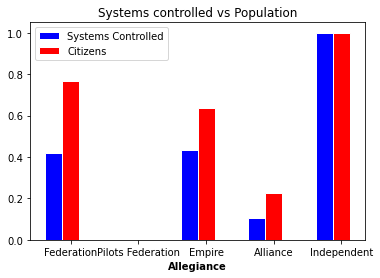

In [3]:
# Plot the data

normalized_citizens = [x / max(citizens) for x in citizens]
normalized_systems = [x / max(systems_controlled) for x in systems_controlled]

# set width of bar
barWidth = 0.25
 
# Set position of bar on X axis
r1 = np.arange(len(citizens))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, normalized_systems, color='blue', width=barWidth, edgecolor='white', label='Systems Controlled')
plt.bar(r2, normalized_citizens, color='red', width=barWidth, edgecolor='white', label='Citizens')
 
# Add xticks on the middle of the group bars
plt.xlabel('Allegiance', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(citizens))], labels)

plt.title("Systems controlled vs Population")

 
# Create legend & Show graphic
plt.legend()
plt.show()


No handles with labels found to put in legend.


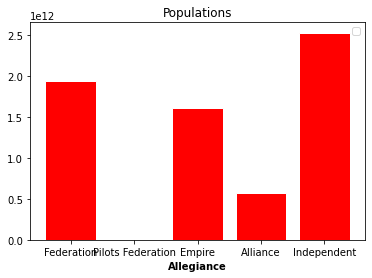

In [4]:
# Plot the data
 
# Set position of bar on X axis
r1 = np.arange(len(citizens))
 
# Make the plot
plt.bar(r1, citizens, color='red', edgecolor='white')
 
# Add xticks on the middle of the group bars
plt.xlabel('Allegiance', fontweight='bold')
plt.xticks([r for r in range(len(citizens))], labels)

plt.title("Populations")
 
# Create legend & Show graphic
plt.legend()
plt.show()

No handles with labels found to put in legend.


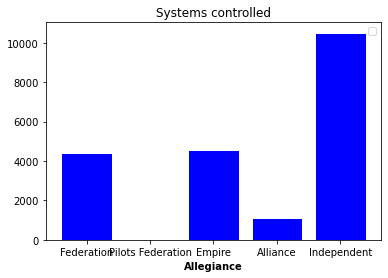

In [5]:
# Plot the data
 
# Set position of bar on X axis
r1 = np.arange(len(citizens))
 
# Make the plot
plt.bar(r1, systems_controlled, color='blue', edgecolor='white')
 
# Add xticks on the middle of the group bars
plt.xlabel('Allegiance', fontweight='bold')
plt.xticks([r for r in range(len(citizens))], labels)

plt.title("Systems controlled")
 
# Create legend & Show graphic
plt.legend()
plt.show()

<h1>Find commodity with highest profit margin and compare it to other commodities</h1>

In [6]:
# Find commodity with highest profit margin and compare it to other commodities

query = [
    {
        '$project': {
            'name': 1, 
            'id': 1, 
            'max_profit': {
                '$subtract': [
                    '$max_sell_price', '$max_buy_price'
                ]
            }, 
            'category': '$category.id', 
            'category_name': '$category.name', 
            'average_price': '$average_price'
        }
    }, {
        '$sort': {
            'max_profit': -1
        }
    }, {
        '$match': {
            'max_profit': {
                '$gt': 0
            }
        }
    }
]

results = eddb['commodities'].aggregate(query)

commodity_names = []
categories = []
category_names = []
profit = []
avg = []

for result in results:
    commodity_names.append(result['name'])
    categories.append(result['category'])
    profit.append(result['max_profit'])
    category_names.append(result['category_name'])
    avg.append(result['average_price'])
    
def color_map(lst):
    to_return = []
    for x in lst:
        if(x > max(lst) / 2):
            to_return.append((x / max(lst), 0, 1- x / max(lst)))
        else:
            to_return.append((0, 1 - x / max(lst), 1 - x / max(lst)))
    return to_return

cat_name_setlist = [x for x in set(category_names)]
cat_color_setlist = color_map(set(categories))
categories = color_map(categories)


No handles with labels found to put in legend.


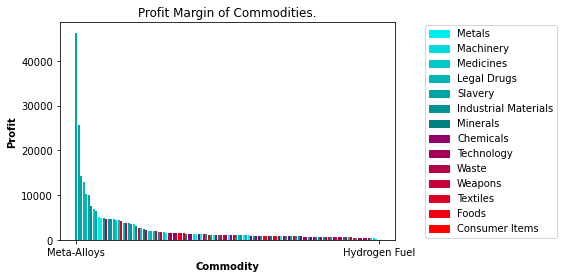

In [7]:
# Profits
 
# Set position of bar on X axis
r1 = np.arange(len(commodity_names))

plt.legend()
 
# Make the plot
plt.bar(r1, profit, color=categories)
 
# Add xticks on the middle of the group bars
plt.xlabel('Commodity', fontweight='bold')
plt.ylabel('Profit', fontweight='bold')
plt.xticks([r1[0], r1[-1]], [commodity_names[0], commodity_names[-1]])
plt.title("Profit Margin of Commodities.")
 
# Create legend & Show graphic
patches = []

for x in range(len(cat_name_setlist)):
    patches.append(mpatches.Patch(color=cat_color_setlist[x], label=cat_name_setlist[x]))

plt.legend(handles=patches, loc='right',bbox_to_anchor=(1.5, 0.5))
plt.show()

No handles with labels found to put in legend.


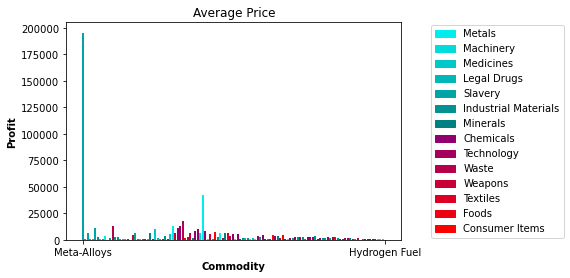

In [8]:
# Averages

# Profits
 
# Set position of bar on X axis
r1 = np.arange(len(commodity_names))

plt.legend()
 
# Make the plot
plt.bar(r1, avg, color=categories)
 
# Add xticks on the middle of the group bars
plt.xlabel('Commodity', fontweight='bold')
plt.ylabel('Profit', fontweight='bold')
plt.xticks([r1[0], r1[-1]], [commodity_names[0], commodity_names[-1]])
plt.title("Average Price")
 
# Create legend & Show graphic
patches = []

for x in range(len(cat_name_setlist)):
    patches.append(mpatches.Patch(color=cat_color_setlist[x], label=cat_name_setlist[x]))

plt.legend(handles=patches, loc='right',bbox_to_anchor=(1.5, 0.5))
plt.show()

<h1>Find the system where you can buy a given commodity for the lowest price.</h1>
<h1>Find the system where you can sell a given commodity for the highest price.</h1>


In [9]:
def get_station_name(station_id):
    #query for the station name and project only the station name
    filter={'id':station_id}
    project={'name': 1}
    result = eddb['stations'].find(filter=filter, projection=project)
    #return the name from the result
    return result[0]['name']

In [10]:
#Get the commodity id
def get_commodity_id(commodity_name):
    #query for the commodity id and filter to only include the id field
    filter={'name': commodity_name}
    project={'id': 1}
    result = eddb['commodities'].find(filter=filter, projection=project)
    #return the id from the result
    return result[0]['id']

In [11]:
def find_station_lowest_buy_price(commodity_name):
    commodity_id = get_commodity_id(commodity_name)
    #query for the station id where the commodity can bought for the lowest price
    #ensure the supply is greater than zero otherwise there is nothing to buy at the station and the buy_price will be zero
    query = [
        {
            '$match': {
                '$and': [
                    {
                        'commodity_id': commodity_id
                    }, {
                        'supply': {
                            '$gt': 0
                        }
                    }
                ]
            }
        }, {
            '$sort': {
                'buy_price': 1
            }
        }, {
            '$limit': 1
        }
    ]
    result = eddb['listings'].aggregate(query)
    data = list(result)
    #get the station id from the result
    station_id = data[0]['station_id']
    station_name = get_station_name(station_id)
    return station_name

In [12]:
def find_station_highest_sell_price(commodity_name):
    commodity_id = get_commodity_id(commodity_name)
    #query for the station id where the commodity can bought for the lowest price
    #ensure the demand is greater than zero otherwise there is nothing to sell at the station and the sell_price will be zero
    query = [
        {
            '$match': {
                '$and': [
                    {
                        'commodity_id': commodity_id
                    }, {
                        'demand': {
                            '$gt': 0
                        }
                    }
                ]
            }
        }, {
            '$sort': {
                'sell_price': -1
            }
        }, {
            '$limit': 1
        }
    ]
    result = eddb['listings'].aggregate(query)
    data = list(result)
    #get the station id from the result
    station_id = data[0]['station_id']
    station_name = get_station_name(station_id)
    return station_name

In [13]:
#Commodity name to lookup
commodity_name = "Liquid oxygen"
station = find_station_lowest_buy_price(commodity_name)
print(f'The station, {station}, has the lowest price to buy {commodity_name}.')

sell_station = find_station_highest_sell_price(commodity_name)
print(f'The station, {sell_station}, has the highest price to sell {commodity_name}.')

The station, Bardeen Terminal, has the lowest price to buy Liquid oxygen.
The station, Neumann Hub, has the highest price to sell Liquid oxygen.


<h1>Find the nearest system that provides a certain service</h1>
<h1>Also doubles for finding black market</h1>

In [63]:
def find_system_service(current_system, has_service_to_find):
    # get current coords
    query = [
        {
            '$match': {
                'name': f'{current_system}'
            }
        }
    ]

    result = eddb['systems_populated'].aggregate(query)
    data = list(result)

    x = data[0]['x']
    y = data[0]['y']
    z = data[0]['z']

    # using coords and service find nearest system with said service

    query = [
        {
            '$match': {
                f'{has_service_to_find}': True
            }
        }, {
            '$lookup': {
                'from': 'systems_populated', 
                'localField': 'system_id', 
                'foreignField': 'id', 
                'as': 'system'
            }
        }, {
            '$project': {
                '_id': {
                    '$arrayElemAt': [
                        '$system', 0
                    ]
                }, 
                'station_name': '$name'
            }
        }, {
            '$project': {
                'system_name': '$_id.name', 
                'station_name': '$station_name', 
                'square_distance': {
                    '$sum': [
                        {
                            '$pow': [
                                {
                                    '$subtract': [
                                        '$_id.x', x
                                    ]
                                }, 2
                            ]
                        }, {
                            '$pow': [
                                {
                                    '$subtract': [
                                        '$_id.y', y
                                    ]
                                }, 2
                            ]
                        }, {
                            '$pow': [
                                {
                                    '$subtract': [
                                        '$_id.z', z
                                    ]
                                }, 2
                            ]
                        }
                    ]
                }
            }
        }, {
        '$project': {
            '_id': '$system_name', 
            'station_name': '$station_name', 
            'square_distance': '$square_distance'
        }
    }, {
        '$sort': {
            'square_distance': 1, 
            'station_name': 1
        }
    },{
        '$match': {
            '_id': {
                '$ne': None
            }
        }
    },{
            '$limit': 1
        }
    ]

    result = eddb['stations'].aggregate(query)
    data = list(result)
    return f"{data[0]['_id']}, {data[0]['station_name']}"

nearest_black_market = find_system_service('Nerthus', 'has_blackmarket')
print(nearest_black_market)


Two Ladies, Beekman Platform


<h1>8.	Find the rarest module and where to buy it</h1>